Importamos las librerías:

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, PredictionErrorDisplay

%matplotlib inline
sns.set_theme()

# Conjunto de datos

## Carga de datos desde archivo
Cargamos el dataset y nos quedamos con los datos pertenecientes a la carga (estado 1), y tan solo dos columnas. También eliminamos duplicados, lo que nos da un total de 6612 muestras.

In [51]:
df = pd.read_excel('dataset.xlsx')
df = df[df["State"] == 1]
df = df[['V', 'SOC']]
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6612 entries, 1065 to 15177
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V       6612 non-null   float64
 1   SOC     6612 non-null   float64
dtypes: float64(2)
memory usage: 155.0 KB


## Selección de atributos de entrada y salida
Nos quedamos con la tensión como única variable predictora.

In [52]:
X = np.asarray(df[df.columns[0]])
y = np.asarray(df[df.columns[1]])

## División en entrenamiento y prueba
Partimos los datos en 70% para entrenamiento y 30% para prueba. También fijamos la semilla para obtener resultados reproducibles en las sucesivas ejecuciones, y que todos los modelos entrenen en los mismos datos.

In [53]:
rng = np.random.RandomState(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rng)

#Modelos de regresión lineales
En sckikit learn se encuentran múltiples algoritmos y modelos de aprendizaje automático denominados estimadores.

Para cada uno realizaremos el preprocesamiento correspondiente (en caso de ser necesario), seguido de una búsqueda de los mejores hiperparámetros valiéndonos de una validación cruzada, para finalmente realizar una evaluación final del mejor modelo sobre el conjunto de prueba.

## Mínimos cuadrados ordinarios
Empleamos regresión polinómica variando el grado del polinomio de 2 a 100.

Mejor modelo: {'polynomialfeatures__degree': 100}
MSE train: 5.7796
Mean fit time 0.0328
Mean score time: 0.0038

MSE test: 5.5821
RMSE test: 2.3626
MAE test: 2.1061

Gráfico de valor real vs estimación


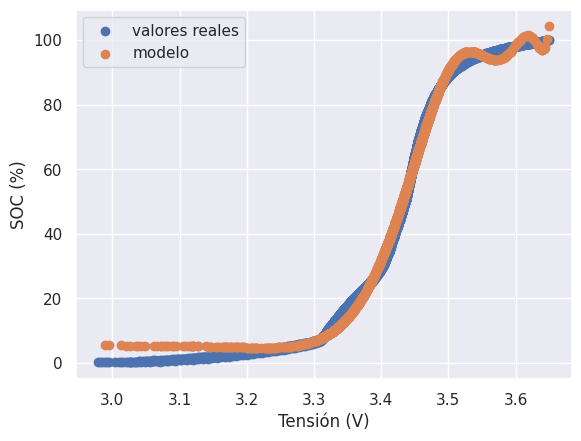

In [ ]:
model = make_pipeline(PolynomialFeatures(), LinearRegression())

param_grid = {'polynomialfeatures__degree': range(2, 101)}

grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error')
grid_search.fit(X_train.reshape(-1, 1), y_train)

index = grid_search.best_index_
print(f"Mejor modelo: {grid_search.best_params_}")
print(f"MSE train: {-grid_search.best_score_:.4f}")
print(f"Mean fit time {grid_search.cv_results_['mean_fit_time'][index]:.4f}")
print(f"Mean score time: {grid_search.cv_results_['mean_score_time'][index]:.4f}")

print("")
y_pred = grid_search.best_estimator_.predict(X_test.reshape(-1, 1))
print(f"MSE test: {mean_squared_error(y_test, y_pred):.4f}")
print(f"RMSE test: {root_mean_squared_error(y_test, y_pred):.4f}")
print(f"MAE test: {mean_absolute_error(y_test, y_pred):.4f}")

print("\nGráfico de valor real vs estimación")
plt.scatter(X, y, label="valores reales")
plt.scatter(X_test, y_pred, label="modelo")
plt.xlabel('Tensión (V)')
plt.ylabel('SOC (%)')
plt.legend()
plt.show()

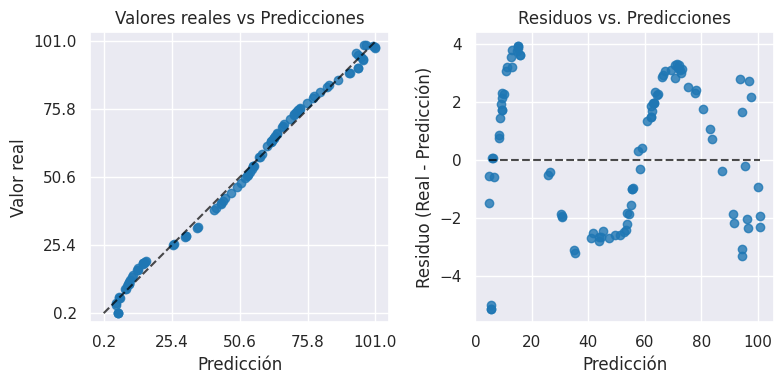

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set(xlabel="Predicción", ylabel="Valor real")
axs[0].set_title("Valores reales vs Predicciones")
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set(xlabel="Predicción", ylabel="Residuo (Real - Predicción)")
axs[1].set_title("Residuos vs. Predicciones")
plt.tight_layout()
plt.show()

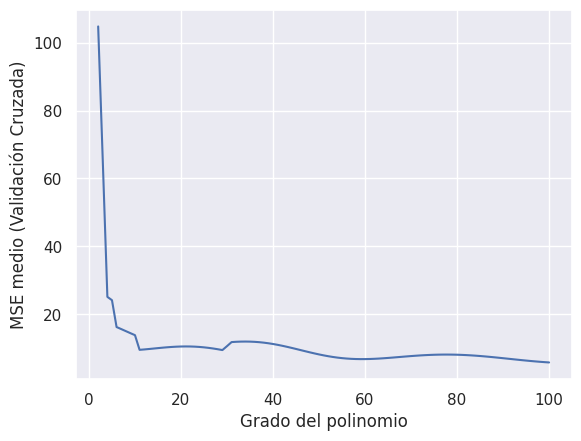

In [ ]:
#evolución del error conforme aumenta el grado del polinomio
plt.plot(range(2, 101), -grid_search.cv_results_['mean_test_score'])
plt.xlabel('Grado del polinomio')
plt.ylabel('MSE medio (Validación Cruzada)')
plt.show()

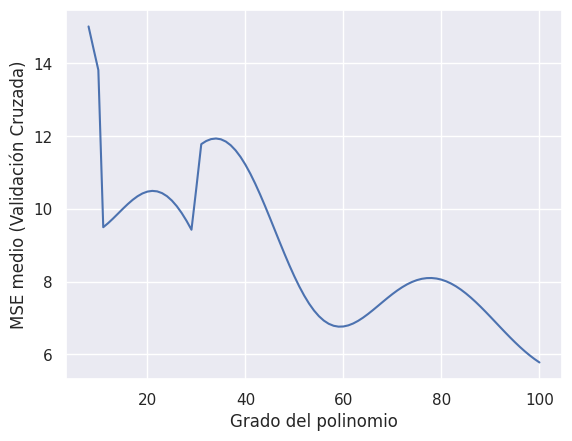

In [ ]:
#descartamos los primeros valores con un error muy alto para ver mejor la forma
plt.plot(range(8, 101), -grid_search.cv_results_['mean_test_score'][-93:])
plt.xlabel('Grado del polinomio')
plt.ylabel('MSE medio (Validación Cruzada)')
plt.show()

## Mínimos cuadrados ordinarios con estandarización
Empleamos regresión polinómica variando el grado del polinomio de 2 a 100. Previamente utilizamos stardard scaler.

Mejor modelo: {'polynomialfeatures__degree': 15}
MSE train: 1.0062
Mean fit time 0.0047
Mean score time: 0.0021

MSE test: 0.9798
RMSE test: 0.9899
MAE test: 0.8338

Gráfico de valor real vs estimación


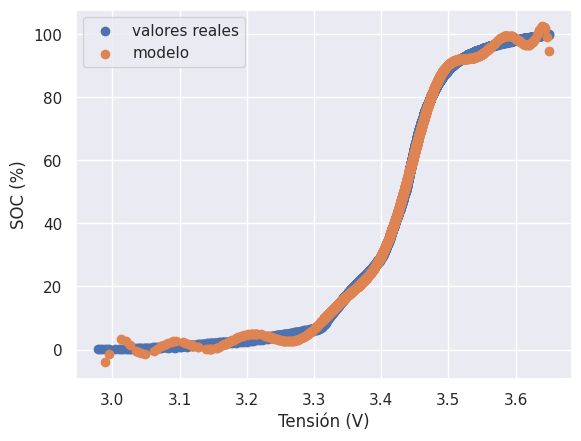

In [ ]:
model = make_pipeline(StandardScaler(), PolynomialFeatures(), LinearRegression())

param_grid = {'polynomialfeatures__degree': range(2, 51)}

grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error')
grid_search.fit(X_train.reshape(-1, 1), y_train)

index = grid_search.best_index_
print(f"Mejor modelo: {grid_search.best_params_}")
print(f"MSE train: {-grid_search.best_score_:.4f}")
print(f"Mean fit time {grid_search.cv_results_['mean_fit_time'][index]:.4f}")
print(f"Mean score time: {grid_search.cv_results_['mean_score_time'][index]:.4f}")

print("")
y_pred = grid_search.best_estimator_.predict(X_test.reshape(-1, 1))
print(f"MSE test: {mean_squared_error(y_test, y_pred):.4f}")
print(f"RMSE test: {root_mean_squared_error(y_test, y_pred):.4f}")
print(f"MAE test: {mean_absolute_error(y_test, y_pred):.4f}")

print("\nGráfico de valor real vs estimación")
plt.scatter(X, y, label="valores reales")
plt.scatter(X_test, y_pred, label="modelo")
plt.xlabel('Tensión (V)')
plt.ylabel('SOC (%)')
plt.legend()
plt.show()

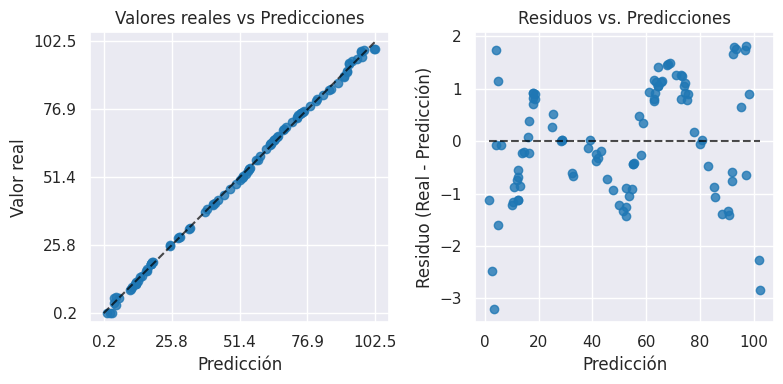

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set(xlabel="Predicción", ylabel="Valor real")
axs[0].set_title("Valores reales vs Predicciones")
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set(xlabel="Predicción", ylabel="Residuo (Real - Predicción)")
axs[1].set_title("Residuos vs. Predicciones")
plt.tight_layout()
plt.show()

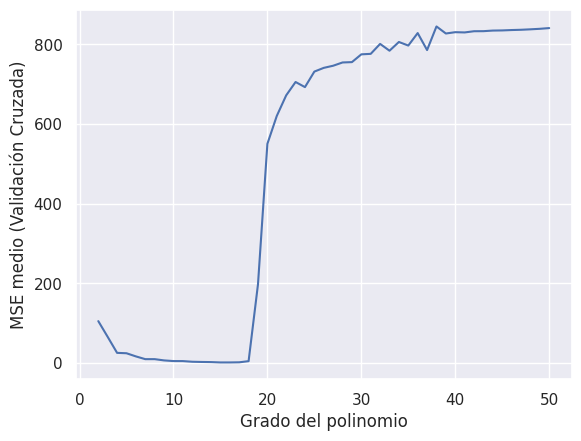

In [ ]:
#evolucion del error conforme aumenta el grado del polinomio
plt.plot(range(2, 51), -grid_search.cv_results_['mean_test_score'])
plt.xlabel('Grado del polinomio')
plt.ylabel('MSE medio (Validación Cruzada)')
plt.show()

#Support Vector Regression (SVR)

Mejor modelo: {'svr__C': 1000.0, 'svr__epsilon': 0.1}
MSE train: 0.1945
Mean fit time 13.3436
Mean score time: 0.1291

MSE test: 0.1883
RMSE test: 0.4340
MAE test: 0.3206

Gráfico de valor real vs estimación


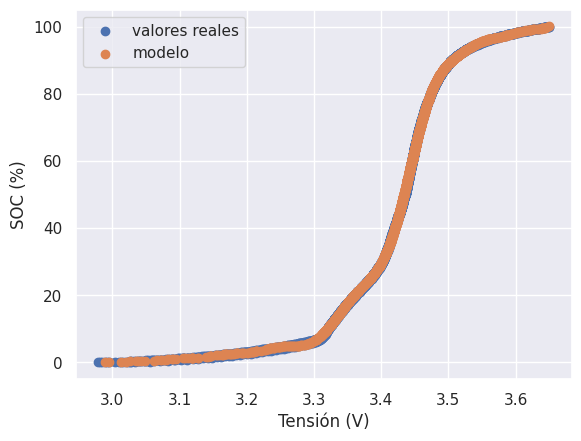

In [ ]:
model = make_pipeline(StandardScaler(), SVR(kernel='rbf'))

param_grid = {'svr__C': [1.0, 10.0, 100.0, 1000.0],
              'svr__epsilon': [0.01, 0.1, 0.5, 1.0]}

grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error')
grid_search.fit(X_train.reshape(-1, 1), y_train)

index = grid_search.best_index_
print(f"Mejor modelo: {grid_search.best_params_}")
print(f"MSE train: {-grid_search.best_score_:.4f}")
print(f"Mean fit time {grid_search.cv_results_['mean_fit_time'][index]:.4f}")
print(f"Mean score time: {grid_search.cv_results_['mean_score_time'][index]:.4f}")

print("")
y_pred = grid_search.best_estimator_.predict(X_test.reshape(-1, 1))
print(f"MSE test: {mean_squared_error(y_test, y_pred):.4f}")
print(f"RMSE test: {root_mean_squared_error(y_test, y_pred):.4f}")
print(f"MAE test: {mean_absolute_error(y_test, y_pred):.4f}")

print("\nGráfico de valor real vs estimación")
plt.scatter(X, y, label="valores reales")
plt.scatter(X_test, y_pred, label="modelo")
plt.xlabel('Tensión (V)')
plt.ylabel('SOC (%)')
plt.legend()
plt.show()

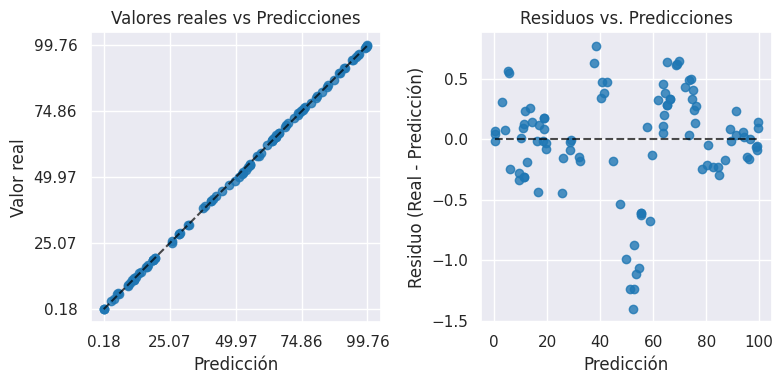

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set(xlabel="Predicción", ylabel="Valor real")
axs[0].set_title("Valores reales vs Predicciones")
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set(xlabel="Predicción", ylabel="Residuo (Real - Predicción)")
axs[1].set_title("Residuos vs. Predicciones")
plt.tight_layout()
plt.show()

#Kernel Ridge Regression (KRR)

Mejor modelo: {'kernelridge__alpha': 0.001, 'kernelridge__gamma': 10.0}
MSE train: 0.0323
Mean fit time 2.1566
Mean score time: 0.0967

MSE test: 0.0327
RMSE test: 0.1809
MAE test: 0.1336

Gráfico de valor real vs estimación


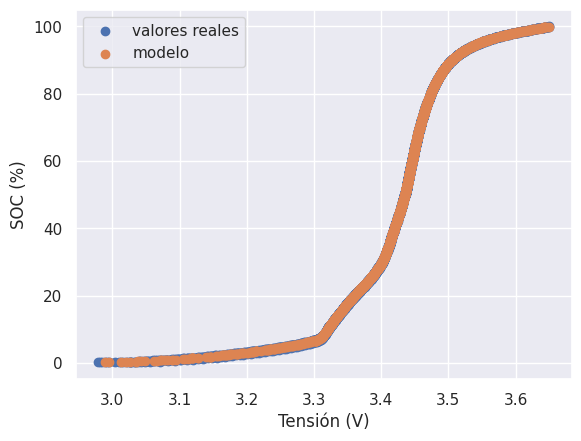

In [ ]:
model = make_pipeline(StandardScaler(), KernelRidge(kernel='rbf'))

param_grid = {'kernelridge__alpha': [0.001, 0.01, 0.1, 1.0],
              'kernelridge__gamma': [0.1, 1.0, 10.0]}

grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error')

grid_search.fit(X_train.reshape(-1, 1), y_train)

index = grid_search.best_index_
print(f"Mejor modelo: {grid_search.best_params_}")
print(f"MSE train: {-grid_search.best_score_:.4f}")
print(f"Mean fit time {grid_search.cv_results_['mean_fit_time'][index]:.4f}")
print(f"Mean score time: {grid_search.cv_results_['mean_score_time'][index]:.4f}")

print("")
y_pred = grid_search.best_estimator_.predict(X_test.reshape(-1, 1))
print(f"MSE test: {mean_squared_error(y_test, y_pred):.4f}")
print(f"RMSE test: {root_mean_squared_error(y_test, y_pred):.4f}")
print(f"MAE test: {mean_absolute_error(y_test, y_pred):.4f}")

print("\nGráfico de valor real vs estimación")
plt.scatter(X, y, label="valores reales")
plt.scatter(X_test, y_pred, label="modelo")
plt.xlabel('Tensión (V)')
plt.ylabel('SOC (%)')
plt.legend()
plt.show()

Intentamos afinarlo más

Mejor modelo: {'kernelridge__alpha': 1e-06, 'kernelridge__gamma': 12.0}
MSE train: 0.0318
Mean fit time 1.2288
Mean score time: 0.0673

MSE test: 0.0323
RMSE test: 0.1796
MAE test: 0.1319

Gráfico de valor real vs estimación


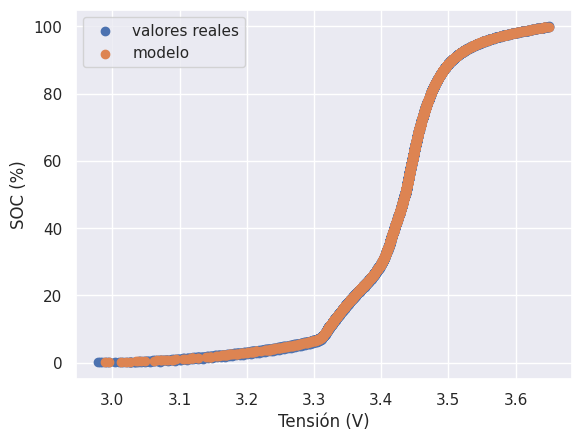

In [ ]:
model = make_pipeline(StandardScaler(), KernelRidge(kernel='rbf'))

param_grid = {'kernelridge__alpha': [1e-6],
              'kernelridge__gamma': [11.0, 12.0, 13.0]}

grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error')

grid_search.fit(X_train.reshape(-1, 1), y_train)

index = grid_search.best_index_
print(f"Mejor modelo: {grid_search.best_params_}")
print(f"MSE train: {-grid_search.best_score_:.4f}")
print(f"Mean fit time {grid_search.cv_results_['mean_fit_time'][index]:.4f}")
print(f"Mean score time: {grid_search.cv_results_['mean_score_time'][index]:.4f}")

print("")
y_pred = grid_search.best_estimator_.predict(X_test.reshape(-1, 1))
print(f"MSE test: {mean_squared_error(y_test, y_pred):.4f}")
print(f"RMSE test: {root_mean_squared_error(y_test, y_pred):.4f}")
print(f"MAE test: {mean_absolute_error(y_test, y_pred):.4f}")

print("\nGráfico de valor real vs estimación")
plt.scatter(X, y, label="valores reales")
plt.scatter(X_test, y_pred, label="modelo")
plt.xlabel('Tensión (V)')
plt.ylabel('SOC (%)')
plt.legend()
plt.show()

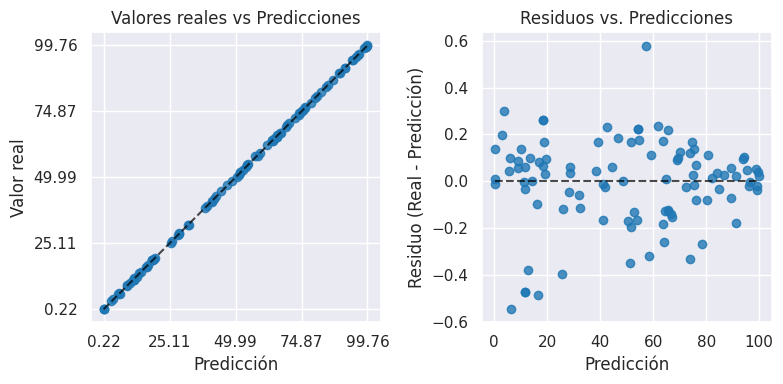

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set(xlabel="Predicción", ylabel="Valor real")
axs[0].set_title("Valores reales vs Predicciones")
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set(xlabel="Predicción", ylabel="Residuo (Real - Predicción)")
axs[1].set_title("Residuos vs. Predicciones")
plt.tight_layout()
plt.show()

#K-Nearest Neighbors (kNN)

Mejor modelo: {'n_neighbors': 31, 'weights': 'uniform'}
MSE train: 0.0338
Mean fit time 0.0012
Mean score time: 0.0044

MSE test: 0.0335
RMSE test: 0.1831
MAE test: 0.1366

Gráfico de valor real vs estimación


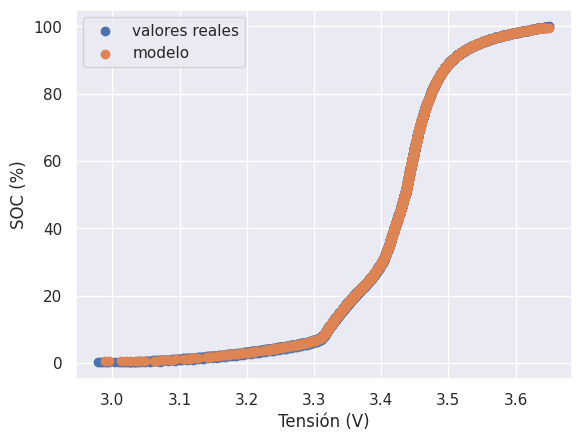

In [47]:
#model = model = make_pipeline(StandardScaler(), KNeighborsRegressor())

#param_grid = {'kneighborsregressor__weights': ['uniform', 'distance'],
#              'kneighborsregressor__n_neighbors': range(2, 101)}

model = KNeighborsRegressor()

param_grid = {'weights': ['uniform', 'distance'],
              'n_neighbors': range(2, 100)}

grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error')
grid_search.fit(X_train.reshape(-1, 1), y_train)

index = grid_search.best_index_
print(f"Mejor modelo: {grid_search.best_params_}")
print(f"MSE train: {-grid_search.best_score_:.4f}")
print(f"Mean fit time {grid_search.cv_results_['mean_fit_time'][index]:.4f}")
print(f"Mean score time: {grid_search.cv_results_['mean_score_time'][index]:.4f}")

print("")
y_pred = grid_search.best_estimator_.predict(X_test.reshape(-1, 1))
print(f"MSE test: {mean_squared_error(y_test, y_pred):.4f}")
print(f"RMSE test: {root_mean_squared_error(y_test, y_pred):.4f}")
print(f"MAE test: {mean_absolute_error(y_test, y_pred):.4f}")

print("\nGráfico de valor real vs estimación")
plt.scatter(X, y, label="valores reales")
plt.scatter(X_test, y_pred, label="modelo")
plt.xlabel('Tensión (V)')
plt.ylabel('SOC (%)')
plt.legend()
plt.show()

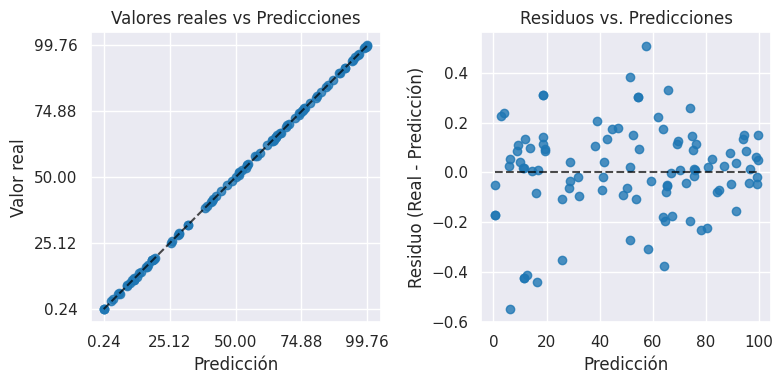

In [48]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set(xlabel="Predicción", ylabel="Valor real")
axs[0].set_title("Valores reales vs Predicciones")
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set(xlabel="Predicción", ylabel="Residuo (Real - Predicción)")
axs[1].set_title("Residuos vs. Predicciones")
plt.tight_layout()
plt.show()

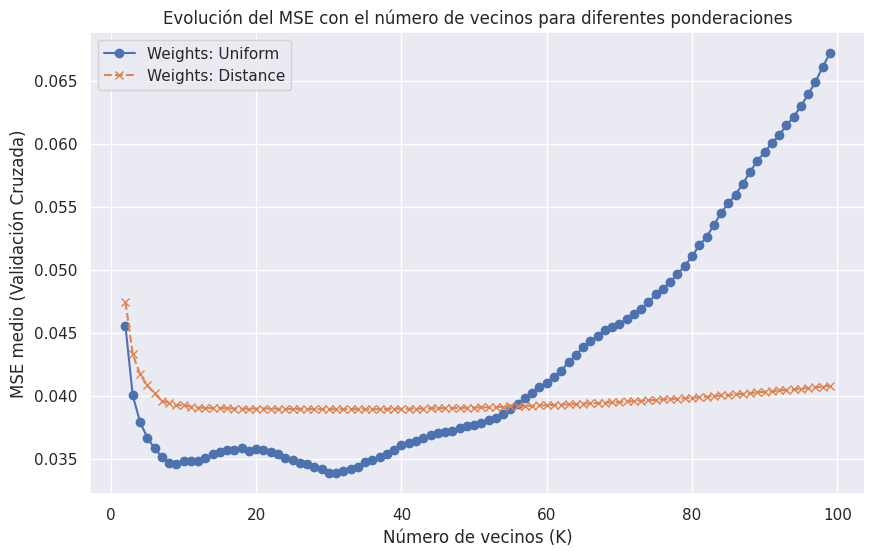

In [49]:
results = grid_search.cv_results_
n_neighbors_values = param_grid['n_neighbors']

uniform_scores_indices = [i for i, params in enumerate(results['params']) if params['weights'] == 'uniform']
uniform_mse_mean = -results['mean_test_score'][uniform_scores_indices]

distance_scores_indices = [i for i, params in enumerate(results['params']) if params['weights'] == 'distance']
distance_mse_mean = -results['mean_test_score'][distance_scores_indices]

plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_values, uniform_mse_mean, label='Weights: Uniform', marker='o', linestyle='-')
plt.plot(n_neighbors_values, distance_mse_mean, label='Weights: Distance', marker='x', linestyle='--')
plt.xlabel('Número de vecinos (K)')
plt.ylabel('MSE medio (Validación Cruzada)')
plt.title('Evolución del MSE con el número de vecinos para diferentes ponderaciones')
plt.legend()
plt.show()

#Decision Tree Regression

Mejor modelo: {'decisiontreeregressor__max_depth': 9}
MSE train: 0.0383
Mean fit time 0.0050
Mean score time: 0.0016

MSE test: 0.0371
RMSE test: 0.1926
MAE test: 0.1462

Gráfico de valor real vs estimación


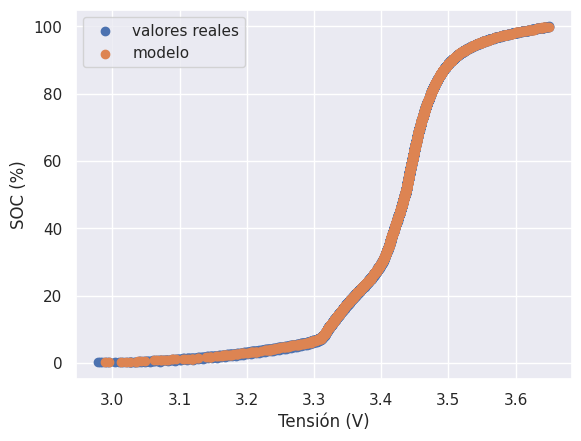

In [ ]:
model = make_pipeline(StandardScaler(), DecisionTreeRegressor())

param_grid = {'decisiontreeregressor__max_depth': range(2, 101)}

grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error')
grid_search.fit(X_train.reshape(-1, 1), y_train)

index = grid_search.best_index_
print(f"Mejor modelo: {grid_search.best_params_}")
print(f"MSE train: {-grid_search.best_score_:.4f}")
print(f"Mean fit time {grid_search.cv_results_['mean_fit_time'][index]:.4f}")
print(f"Mean score time: {grid_search.cv_results_['mean_score_time'][index]:.4f}")

print("")
y_pred = grid_search.best_estimator_.predict(X_test.reshape(-1, 1))
print(f"MSE test: {mean_squared_error(y_test, y_pred):.4f}")
print(f"RMSE test: {root_mean_squared_error(y_test, y_pred):.4f}")
print(f"MAE test: {mean_absolute_error(y_test, y_pred):.4f}")

print("\nGráfico de valor real vs estimación")
plt.scatter(X, y, label="valores reales")
plt.scatter(X_test, y_pred, label="modelo")
plt.xlabel('Tensión (V)')
plt.ylabel('SOC (%)')
plt.legend()
plt.show()

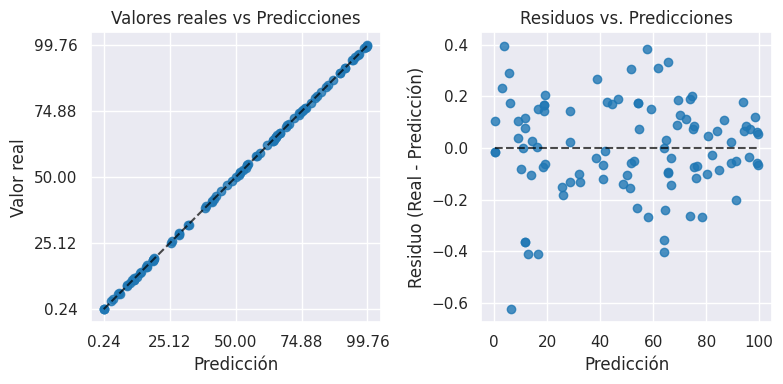

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set(xlabel="Predicción", ylabel="Valor real")
axs[0].set_title("Valores reales vs Predicciones")
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set(xlabel="Predicción", ylabel="Residuo (Real - Predicción)")
axs[1].set_title("Residuos vs. Predicciones")
plt.tight_layout()
plt.show()

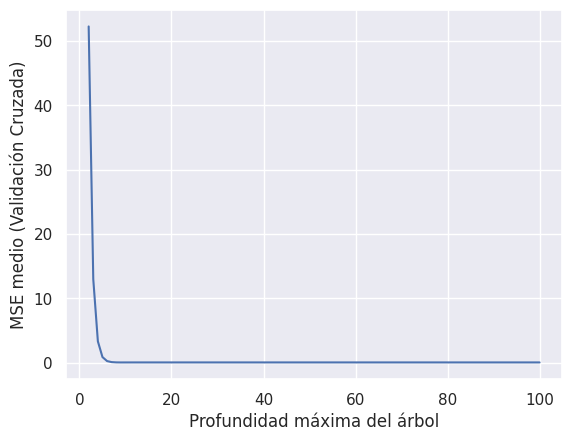

In [ ]:
#Evolucion del error conforme se aumenta la profundidad
plt.plot(range(2, 101), -grid_search.cv_results_['mean_test_score'])
plt.xlabel('Profundidad máxima del árbol')
plt.ylabel('MSE medio (Validación Cruzada)')
plt.show()

#Ensembles

Mejor modelo: {'histgradientboostingregressor__max_iter': 100}
MSE train: 0.0463
Mean fit time 0.1806
Mean score time: 0.0101

MSE test: 0.0468
RMSE test: 0.2164
MAE test: 0.1699

Gráfico de valor real vs estimación


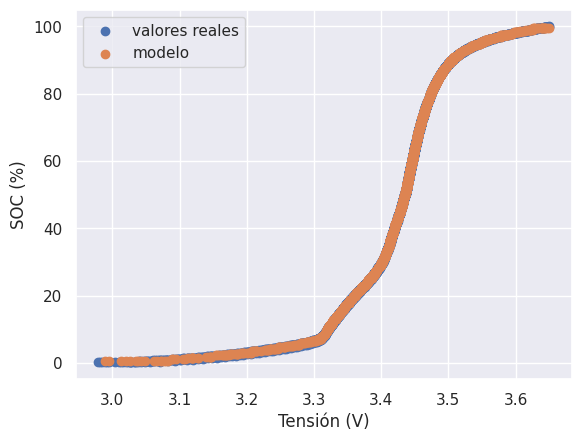

In [ ]:
model = make_pipeline(StandardScaler(), HistGradientBoostingRegressor())

param_grid = {'histgradientboostingregressor__max_iter': [10, 20, 50, 100, 300, 500]}

grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error')
grid_search.fit(X_train.reshape(-1, 1), y_train)

index = grid_search.best_index_
print(f"Mejor modelo: {grid_search.best_params_}")
print(f"MSE train: {-grid_search.best_score_:.4f}")
print(f"Mean fit time {grid_search.cv_results_['mean_fit_time'][index]:.4f}")
print(f"Mean score time: {grid_search.cv_results_['mean_score_time'][index]:.4f}")

print("")
y_pred = grid_search.best_estimator_.predict(X_test.reshape(-1, 1))
print(f"MSE test: {mean_squared_error(y_test, y_pred):.4f}")
print(f"RMSE test: {root_mean_squared_error(y_test, y_pred):.4f}")
print(f"MAE test: {mean_absolute_error(y_test, y_pred):.4f}")

print("\nGráfico de valor real vs estimación")
plt.scatter(X, y, label="valores reales")
plt.scatter(X_test, y_pred, label="modelo")
plt.xlabel('Tensión (V)')
plt.ylabel('SOC (%)')
plt.legend()
plt.show()

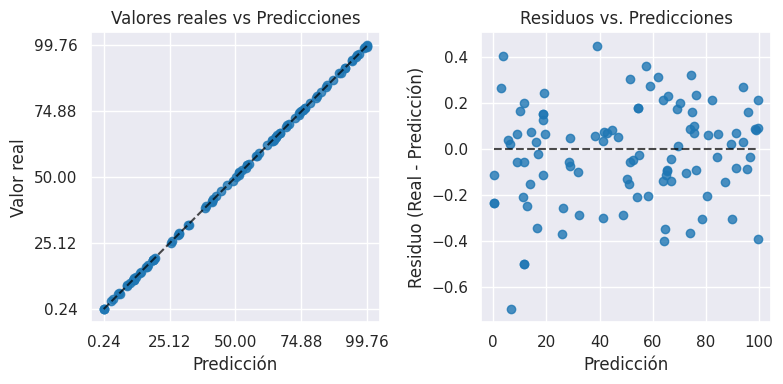

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set(xlabel="Predicción", ylabel="Valor real")
axs[0].set_title("Valores reales vs Predicciones")
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set(xlabel="Predicción", ylabel="Residuo (Real - Predicción)")
axs[1].set_title("Residuos vs. Predicciones")
plt.tight_layout()
plt.show()

#Multi-Layer Perceptron (MLP)

Mejor modelo: {'mlpregressor__activation': 'relu', 'mlpregressor__hidden_layer_sizes': (100, 100)}
MSE train: 0.0306
Mean fit time 154.4028
Mean score time: 0.0070

MSE test: 0.0307
RMSE test: 0.1752
MAE test: 0.1289

Gráfico de valor real vs estimación


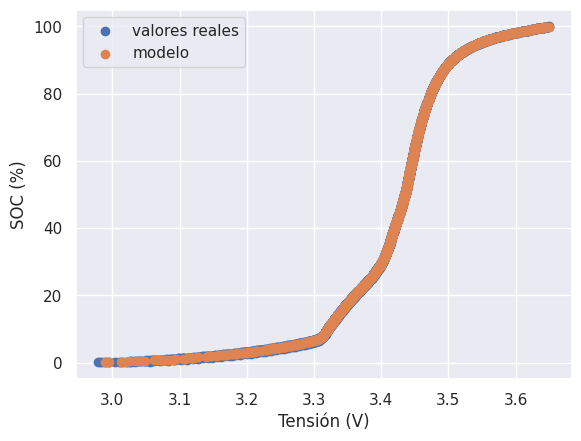

In [58]:
model = make_pipeline(StandardScaler(), MLPRegressor(solver='lbfgs',
                                                     max_iter=5000,
                                                     random_state=rng))

param_grid = {'mlpregressor__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
              'mlpregressor__activation': ['relu', 'tanh']}

grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error')
grid_search.fit(X_train.reshape(-1, 1), y_train)

index = grid_search.best_index_
print(f"Mejor modelo: {grid_search.best_params_}")
print(f"MSE train: {-grid_search.best_score_:.4f}")
print(f"Mean fit time {grid_search.cv_results_['mean_fit_time'][index]:.4f}")
print(f"Mean score time: {grid_search.cv_results_['mean_score_time'][index]:.4f}")

print("")
y_pred = grid_search.best_estimator_.predict(X_test.reshape(-1, 1))
print(f"MSE test: {mean_squared_error(y_test, y_pred):.4f}")
print(f"RMSE test: {root_mean_squared_error(y_test, y_pred):.4f}")
print(f"MAE test: {mean_absolute_error(y_test, y_pred):.4f}")

print("\nGráfico de valor real vs estimación")
plt.scatter(X, y, label="valores reales")
plt.scatter(X_test, y_pred, label="modelo")
plt.xlabel('Tensión (V)')
plt.ylabel('SOC (%)')
plt.legend()
plt.show()

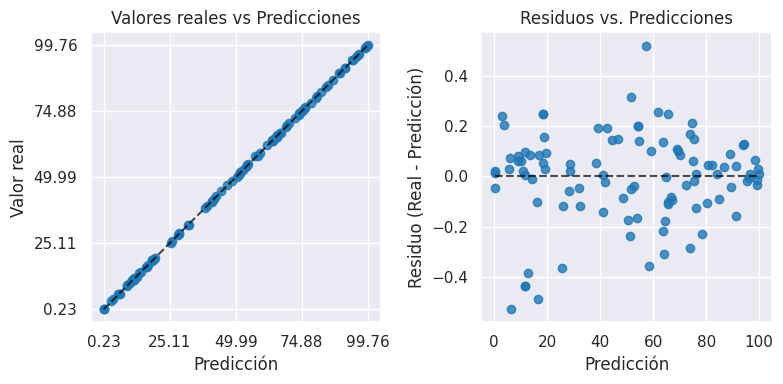

In [59]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set(xlabel="Predicción", ylabel="Valor real")
axs[0].set_title("Valores reales vs Predicciones")
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set(xlabel="Predicción", ylabel="Residuo (Real - Predicción)")
axs[1].set_title("Residuos vs. Predicciones")
plt.tight_layout()
plt.show()

La transformación de la variable objetivo reduce considerablemente el tiempo de entrenamiento al alcanzar más rápido la convergencia, pero los resultados son peores.

Mejor modelo: {'mlpregressor__activation': 'relu', 'mlpregressor__hidden_layer_sizes': (50,)}
Mean fit time 0.4918
Mean score time: 0.0028

MSE train: 0.0503
MSE test: 0.0517
RMSE test: 0.2274
MAE test: 0.1773

Gráfico de valor real vs estimación


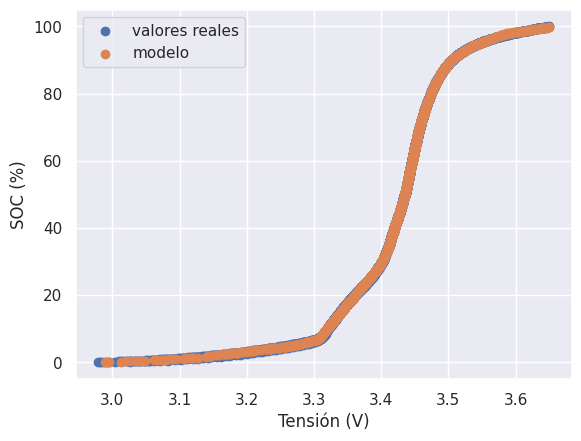

In [60]:
scaler_y = StandardScaler()

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()

model = make_pipeline(StandardScaler(), MLPRegressor(solver='lbfgs',
                                                     max_iter=5000,
                                                     random_state=rng))

param_grid = {'mlpregressor__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
              'mlpregressor__activation': ['relu', 'tanh']}

grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error')
grid_search.fit(X_train.reshape(-1, 1), y_train_scaled)

index = grid_search.best_index_
print(f"Mejor modelo: {grid_search.best_params_}")

print(f"Mean fit time {grid_search.cv_results_['mean_fit_time'][index]:.4f}")
print(f"Mean score time: {grid_search.cv_results_['mean_score_time'][index]:.4f}")

print("")
y_train_pred_scaled = grid_search.best_estimator_.predict(X_train.reshape(-1, 1))
y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
print(f"MSE train: {mean_squared_error(y_train, y_train_pred):.4f}")
y_test_pred_scaled = grid_search.best_estimator_.predict(X_test.reshape(-1, 1))
y_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
print(f"MSE test: {mean_squared_error(y_test, y_pred):.4f}")
print(f"RMSE test: {root_mean_squared_error(y_test, y_pred):.4f}")
print(f"MAE test: {mean_absolute_error(y_test, y_pred):.4f}")

print("\nGráfico de valor real vs estimación")
plt.scatter(X, y, label="valores reales")
plt.scatter(X_test, y_pred, label="modelo")
plt.xlabel('Tensión (V)')
plt.ylabel('SOC (%)')
plt.legend()
plt.show()